<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Netoworks and Computer Vision with Tensorflow.

Computer Vision is the practice of writing algorithms that can discover pattersn in visual data. Such as the camera of a self-driving car recognizing the car infront.

In [3]:
# Get the data.
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
local_zip = './pizza_steak.zip'
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall()
zip_ref.close()

--2025-08-05 06:23:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.207, 74.125.195.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   251MB/s    in 0.4s    

2025-08-05 06:23:15 (251 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



## Inspect the data (become one with the data)

A very crucial step at the beginning of any Machine Learning project is becoming one with the project.

Hence we need to visualize many samples of our data

In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train

pizza  steak


In [6]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [8]:
import os

# wak through the pizza_steak dir and list number of files.
for dirpath, dirnames, filenames in os.walk('./pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in ./pizza_steak
There are 2 directories and 0 images in ./pizza_steak/test
There are 0 directories and 250 images in ./pizza_steak/test/pizza
There are 0 directories and 250 images in ./pizza_steak/test/steak
There are 2 directories and 0 images in ./pizza_steak/train
There are 0 directories and 750 images in ./pizza_steak/train/pizza
There are 0 directories and 750 images in ./pizza_steak/train/steak


In [9]:
# Another way to find out how many images are in a file.
num_steak_images_train = len(os.listdir('./pizza_steak/train/steak'))
num_steak_images_train

750

In [10]:
# To visualize our images, first let's get the class names programatically.

import pathlib
import numpy as np

data_dir = pathlib.Path('./pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


Image shape: (512, 512, 3)


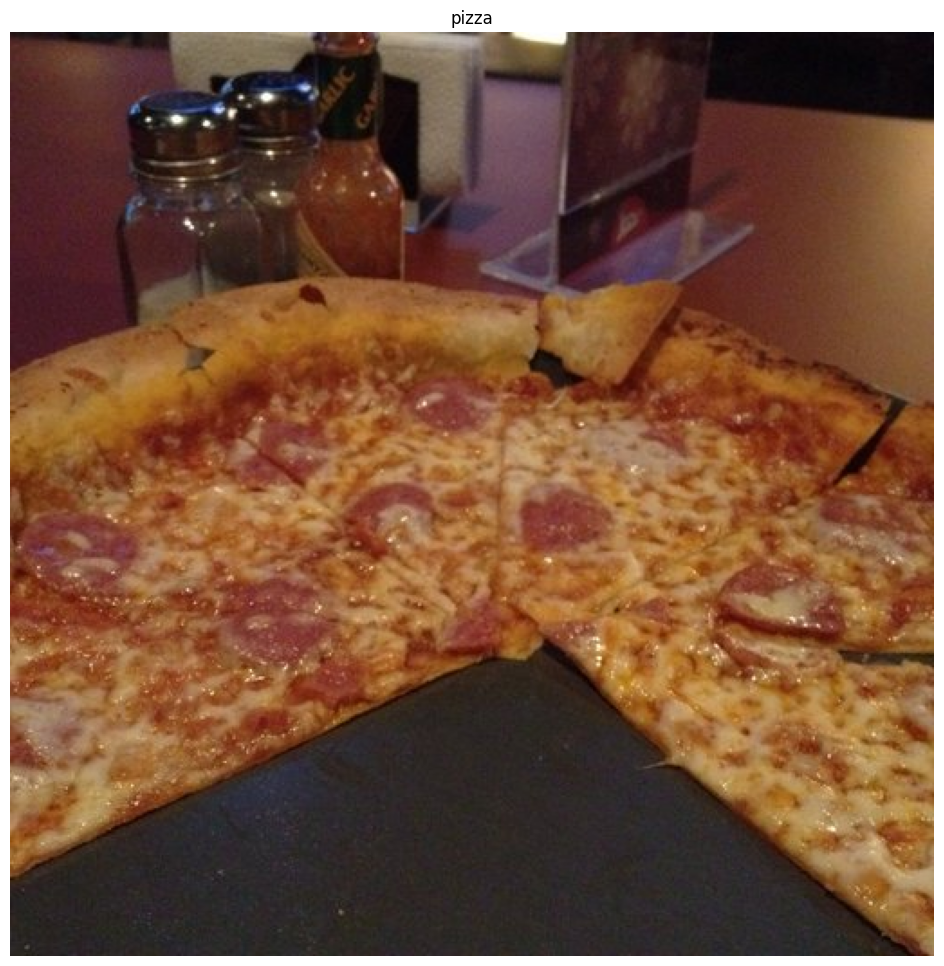

In [16]:
# Let's visualize our images.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

plt.figure(figsize=(12, 12))

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path.
  random_image_path = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib.
  img = mpimg.imread(target_folder + '/' + random_image_path[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

# View a random image from the training dataset.
img = view_random_image(target_dir='./pizza_steak/train/', target_class='pizza')

In [17]:
img.dtype

dtype('uint8')

In [18]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 38,  22,  23],
        [ 36,  20,  21],
        [ 35,  21,  21],
        ...,
        [ 12,   9,  16],
        [ 10,   7,  14],
        [  8,   5,  12]],

       [[ 44,  24,  26],
        [ 39,  21,  21],
        [ 38,  19,  21],
        ...,
        [ 12,   9,  16],
        [ 11,   8,  15],
        [ 11,   8,  15]],

       [[ 53,  27,  30],
        [ 50,  26,  26],
        [ 48,  23,  26],
        ...,
        [ 13,   8,  15],
        [ 15,  10,  17],
        [ 16,  11,  18]],

       ...,

       [[ 44,  40,  39],
        [ 44,  40,  37],
        [ 43,  39,  36],
        ...,
        [152, 116,  80],
        [153, 117,  81],
        [157, 123,  85]],

       [[ 43,  39,  36],
        [ 43,  39,  36],
        [ 42,  38,  35],
        ...,
        [144, 106,  70],
        [156, 120,  84],
        [159, 123,  87]],

       [[ 40,  36,  33],
        [ 40,  36,  33],
        [ 40,  37,  32],
        ...,
        [119,  80,  4

In [19]:
# Get all the pixel values between 0 and 1.

img/ 255.

array([[[0.14901961, 0.08627451, 0.09019608],
        [0.14117647, 0.07843137, 0.08235294],
        [0.1372549 , 0.08235294, 0.08235294],
        ...,
        [0.04705882, 0.03529412, 0.0627451 ],
        [0.03921569, 0.02745098, 0.05490196],
        [0.03137255, 0.01960784, 0.04705882]],

       [[0.17254902, 0.09411765, 0.10196078],
        [0.15294118, 0.08235294, 0.08235294],
        [0.14901961, 0.0745098 , 0.08235294],
        ...,
        [0.04705882, 0.03529412, 0.0627451 ],
        [0.04313725, 0.03137255, 0.05882353],
        [0.04313725, 0.03137255, 0.05882353]],

       [[0.20784314, 0.10588235, 0.11764706],
        [0.19607843, 0.10196078, 0.10196078],
        [0.18823529, 0.09019608, 0.10196078],
        ...,
        [0.05098039, 0.03137255, 0.05882353],
        [0.05882353, 0.03921569, 0.06666667],
        [0.0627451 , 0.04313725, 0.07058824]],

       ...,

       [[0.17254902, 0.15686275, 0.15294118],
        [0.17254902, 0.15686275, 0.14509804],
        [0.16862745, 0

In [20]:
# get the maximum and minimum pixel value.
print(f'Maximum pixel value: {tf.reduce_max(img)}')
print(f'Minimum pixel value: {tf.reduce_min(img)}')

Maximum pixel value: 255
Minimum pixel value: 0


## An end-to-end example

Let's build CNN to find patterns in our images, more speicifically we need a way to:

1. Load our images.
2. Preprocess our images.
3. Build a CNN to find patterns in our images.
4. Compile our CNN.
5. Fit the CNN to our training data.

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)

valid_generator = ImageDataGenerator(rescale=1./255)


# Setup paths to our data directories.
train_dir = './pizza_steak/train'
test_dir = './pizza_steak/test'

# Import data from directories and turn in into batches.
train_data = train_datagen.flow_from_directory(


)

TypeError: ImageDataGenerator.flow_from_directory() missing 1 required positional argument: 'directory'